In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
import random

In [ ]:
'''

    u'' + p(x) * u' + q(x) * u = phi(x)
    u(0) = u(l) = 0

    apply u' = w
    get system of ODEs:

    u' = w
    w' = -p(x) * w - q(x) * u + phi(x)

'''

In [9]:
p = lambda x: 1 / 2 / (1 + x)
q = lambda x: -(1 + 2*x) / 2 / (1+x)
phi = lambda x: (3 * math.cos(x) - (3 + 4 * x) * math.sin(x)) / 2 / math.sqrt(1 + x)
l = 1

In [10]:
# technical

def ODEs(y, x, p, q, phi):
    u, w = y
    dydt = [w, -p(x) * w - q(x) * u + phi(x)]
    return dydt

def res(ODEs, a, b, n, p, q, phi, optimization_parameter):
    print(optimization_parameter)
    y0 = [1.0, optimization_parameter]
    X = np.linspace(a, b, n)
    sol = odeint(ODEs, y0, X, args=(p, q, phi))
    #plt.plot(X, sol[:, 0], label='u(x)', linewidth=1.5)
    return sol[-1]

def opr(arr):
    return (arr[0] - 2 * arr[1]) - 0.1704

In [ ]:
'''

    ищем с помощью прямой
    прямую определяем по двум "выстрелам"
    находим b1 и b2 случайно в общем-то
    запускаем решение для них, получаем u1 и u2
    таким образом есть СЛАУ
    u1 = A * b1 + B
    u2 = A * b2 + B
    отсюда легко вывести
    A = (u1 - u2) / (b1 - b2)
    B = u1 - b1 * (u1 - u2) / (b1 - b2)
    тогда мы знаем прямую, можем решить уравнение
    u = 0 = A * b + B
    получаем
    b = - B / A = b1 - u1 * (b1 - b2) / (u1 - u2)

'''

In [6]:
optF = lambda opt_param: opr(res(ODEs, 0, l, 1001, p, q, phi, opt_param))
b1 = random.randrange(-10, 10)
b2 = random.randrange(-10, 10)
u1 = optF(b1)
u2 = optF(b2)
b = b1 - u1 * (b1 - b2) / (u1 - u2)
optF(b), b

-3
-9
3.9501011057208046e-05


(-3.321997310568037e-08, 3.9501011057208046e-05)

проверка

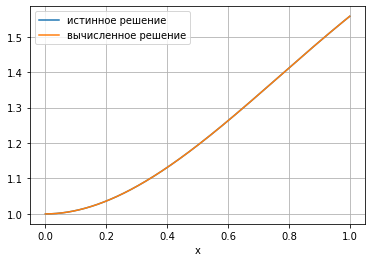

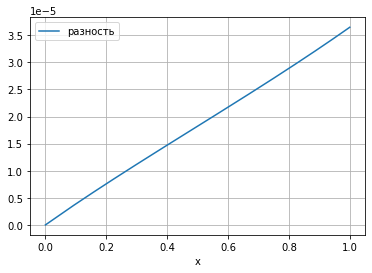

In [14]:
xx = np.linspace(0, l, 1001)
u0 = np.sqrt(1 + xx) * np.sin(xx) + np.exp(-xx)
plt.plot(xx, u0, label = 'истинное решение')
y0 = [1.0, b]
X = np.linspace(0, l, 1001)
sol = odeint(ODEs, y0, X, args=(p, q, phi))
plt.plot(X, sol[:, 0], label='вычисленное решение', linewidth=1.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()

plt.plot(X, sol[:, 0] - u0, label='разность', linewidth=1.5)
plt.legend(loc='best')
plt.xlabel('x')
plt.grid()
plt.show()